# Research on the sale of computer games

### Stage 1. Data research

In [1]:
# import libraries
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats as st
import numpy as np

%matplotlib inline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
data = pd.read_csv('./games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# check the general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# check null values in column 'Name' and 'Genre'
print('Name is null:', data['Name'].isna().sum())
print('Genre is null:', data['Genre'].isna().sum())
data[data['Name'].isna()]

Name is null: 2
Genre is null: 2


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


###### <font color='red'> These two raws don't contain any useful information and can be removed from analysis </font>

In [5]:
# check the null and unique value in column 'Platform'
data['Platform'].isna().sum()
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

###### <font color='green'> There aren't null or duplicated values </font>

In [6]:
# check the max and min year of release
print('count of Null values Date:', data['Year_of_Release'].isna().sum())
print('min date of release:',data['Year_of_Release'].min())
print('max date of release:',data['Year_of_Release'].max())


count of Null values Date: 269
min date of release: 1980.0
max date of release: 2016.0


###### <font color='red'> NaN values should be filled </font>

In [7]:
# check the sales
sales = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']

for sale in sales:
    print(sale, 'min:',data[sale].min())
    print(sale, 'max:',data[sale].max())
    print('--------------------')

NA_sales min: 0.0
NA_sales max: 41.36
--------------------
EU_sales min: 0.0
EU_sales max: 28.96
--------------------
JP_sales min: 0.0
JP_sales max: 10.22
--------------------
Other_sales min: 0.0
Other_sales max: 10.57
--------------------


###### <font color='green'> All values look realistic </font>

In [8]:
# check scores
print('count of null values Critic_Score:',data['Critic_Score'].isna().sum())
print('Critic_Score min:',data['Critic_Score'].min())
print('Critic_Score max:',data['Critic_Score'].max())

print('------------------------------------------')
print('count of null values User_Score:',data['User_Score'].isna().sum())

count of null values Critic_Score: 8578
Critic_Score min: 13.0
Critic_Score max: 98.0
------------------------------------------
count of null values User_Score: 6701


In [9]:
data['User_Score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: User_Score, Length: 96, dtype: int64

##### <font color='green'> There are null values in Critic_Score and User_Score column. Remain unchanged these values. </font> <br> <font color='red'> And there is 'tbd' value in column 'User_Score', that mean To Be Determined. Will change 'tbd' to NaN value </font>

In [10]:
# chenk unique values in column 'Rating' (rating from Entertainment Software Rating Board)
print('Rating is null:', data['Rating'].isna().sum())
data['Rating'].value_counts()

Rating is null: 6766


E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

##### E  ------        Everyone <br>T  ------        Teen (13+) <br>M  ------        Mature (17+) <br>E10+ --     Everyone 10+ <br>EC ----       Early Childhood <br>RP ----       Rating pending <br>K-A ---      Kids to Adults (K-A) until 1998, when it was renamed to "Everyone" <br>AO ----       Adults Only (18+) <br>

##### <font color='green'> NaN values Remain unchanged.<br> <font color='red'> K-A can be replace to E </font>

### Stage 2. Data preparation

In [11]:
# rename the table header
data.columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
# remove null values in column 'Name' and 'Genre'
data = data.loc[(data['name'].isnull() == False)]
print(data['name'].isna().sum())

0


In [13]:
# fill the null value in column date
print('count of Null values Date before:', data['year_of_release'].isna().sum())
data.loc[data['year_of_release'].isna() == True].head()

count of Null values Date before: 269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [14]:
# extract the year from column 'name'
def extract_year(text):
    match = re.search(r'(?P<year>\b(19|20)\d{2}\b)', text)
    if match:
        return match.group('year')
    return None
    
data['name_year'] = data['name'].apply(extract_year)
data.loc[data['year_of_release'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,None
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,None


In [15]:
# fill the year in column 'year_of_release' which was extracted from Name 
mask = data['year_of_release'].isnull()
data['year_of_release'][mask] = data['name_year']

print('count of Null values Date after replacment year from name:', data['year_of_release'].isna().sum())

count of Null values Date after replacment year from name: 252


##### 17 values was filled, fill the rest as a median year in terms of platform

In [16]:
# Replace the rest NaN values to median in terms of platform
for platform in data['platform'].unique():
    filter_flags = data['year_of_release'].isnull() & (data['platform'] == platform)
    data.loc[filter_flags, 'year_of_release'] = data.loc[data['platform'] == platform, 'year_of_release'].median()


print('count of Null values in Date after:', data['year_of_release'].isna().sum())

count of Null values in Date after: 0


In [17]:
# the column name_year was subsidiary,  and now we can drop it
data = data.drop(columns='name_year')

##### There are Null values in columns 'critic_score' and 'user_score'. We can't filled these values by anything, because we can't pridict the behaive of user and critics. Moreover the each game is unique, and it's not correct to apply median or mean value for filling NaN <br> The abbreviation 'tbd' in column 'user score' stands for 'To be Determined'. Actually, it means the game haven't have rating yet, or that the game is not popular enought for users. The best way, to replace these values to NaN and change the column type to 'float' for future calculation.

In [18]:
# change 'tbd' to 'None'
data['user_score'] = data['user_score'].replace('tbd', None)

In [19]:
# change the type of columns
data['year_of_release'].value_counts()
data = data.astype({'year_of_release': 'int','user_score': 'float'})
# check the type was updated and tbd was changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         8760 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
# calculate the total sales and add additional column
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Stage 3. Datа analysis

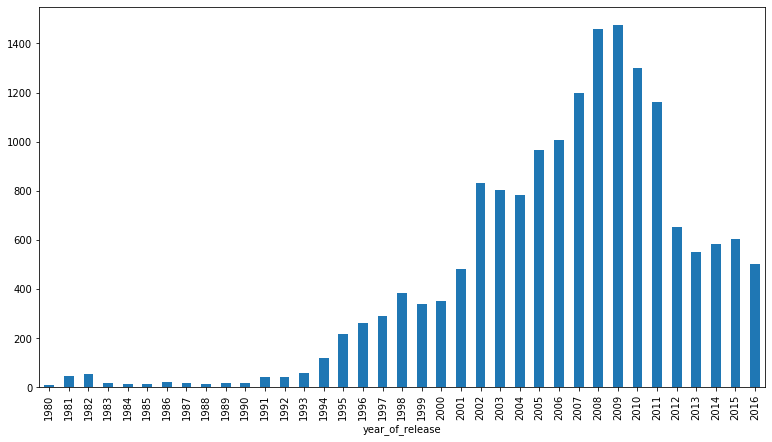

In [21]:
# check the number of games released each year
games_per_year = data.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', figsize=(13,7));

##### it can be seen that the trend has changed since 2012. The number of games was reduced twice.  I think that a new modern trend in the computer games industry began in 2012, and for further analysis we should use only data from the last 5 years.

In [22]:
# check the sales in term of platform
sales_platform = data.groupby('platform')['total_sales'].sum().sort_values()
sales_platform.tail(10)

platform
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

##### let's take for analysis Top-8 the most popular platforms with total sales up to 300 mln

In [23]:
# build the distribution in terms of year of release  for top 8 platforms
# filtered the data by top-8 platforms
data_top_sales_platform = data.loc[data['platform'].isin(['PS4','GBA','PS','DS','Wii','PS3','X360','PS2'])]
# create pivot table 
data_top_sales_platform_pivot = data_top_sales_platform.pivot_table(index = ['platform','year_of_release'],
                                                                    values = 'total_sales', aggfunc = 'sum')
data_top_sales_platform_pivot = data_top_sales_platform_pivot.reset_index()
data_top_sales_platform_pivot.head()

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


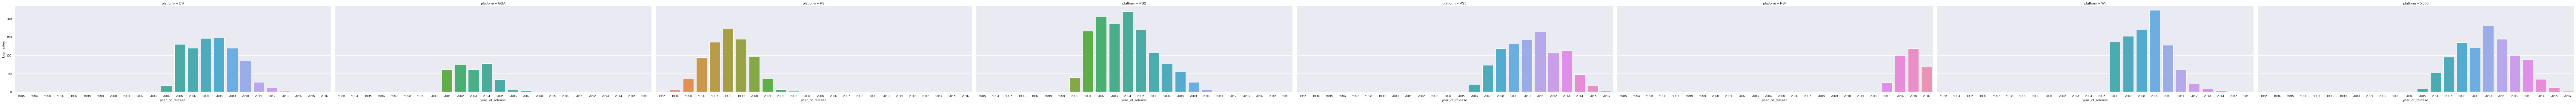

In [24]:
#apply the default seaborn theme, scaling, and color palette
sns.set()
# build the plot for each platform separately
sns.catplot(x = 'year_of_release', kind = 'bar', y ='total_sales', col = 'platform', data=data_top_sales_platform_pivot, 
            height=5, aspect = 3);

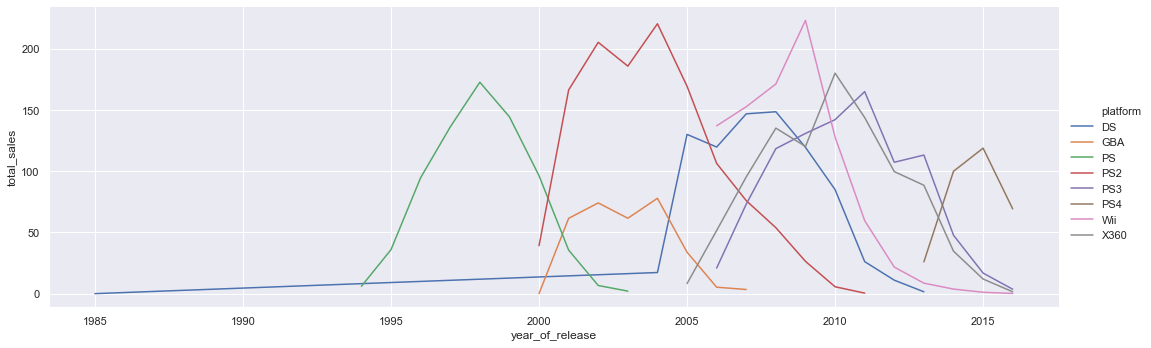

In [25]:
# build the one plot for all platforms
sns.relplot(x = 'year_of_release', y ='total_sales', hue='platform',kind='line',
            data=data_top_sales_platform_pivot, height=5, aspect = 3);

##### On the example of a sample of TOP-8 popular platforms, it can be seen that the 'Platform Lifetime' is 7-11 years, the peak of sales falls on the 4-5th year of the platform's existence. It is also seen there are 3-4 platforms are popular at the same time,  respectively, it is necessary to carefully look at platforms that are only gaining popularity, or  release of new platforms expect  in the near future. So, for the future analysis we can use data for 5 past years.

In [26]:
# filter the data by range 2012-2016 year of release for the future analysis
data_filtered = data.loc[data['year_of_release'] > 2011]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 16 to 16714
Data columns (total 12 columns):
name               2896 non-null object
platform           2896 non-null object
year_of_release    2896 non-null int64
genre              2896 non-null object
na_sales           2896 non-null float64
eu_sales           2896 non-null float64
jp_sales           2896 non-null float64
other_sales        2896 non-null float64
critic_score       1316 non-null float64
user_score         1587 non-null float64
rating             1618 non-null object
total_sales        2896 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 294.1+ KB


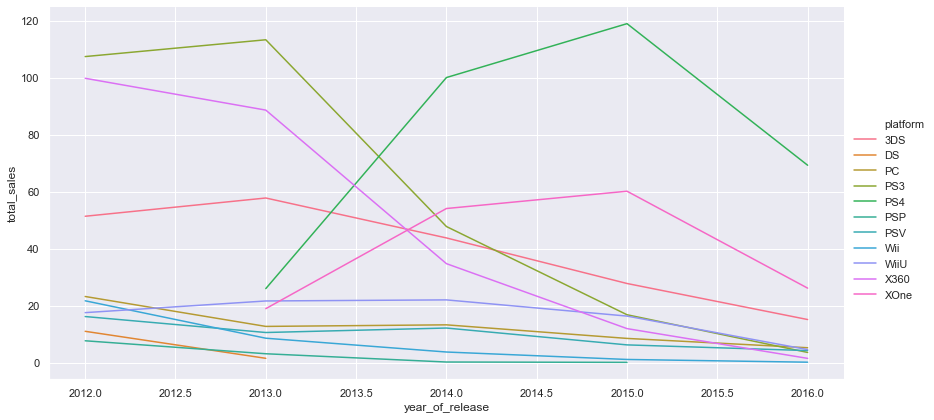

In [27]:
# check the sales dynamic for the filtered data in terms of platform
# create the pivot table for filtering data
data_filtered_pivot = data_filtered.pivot_table(index = ['platform','year_of_release'],
                                                                    values = 'total_sales', aggfunc = 'sum')
data_filtered_pivot = data_filtered_pivot.reset_index()

# build the plot showingrelationship between year_of_release and total_sales
sns.relplot(x = 'year_of_release', y ='total_sales', hue='platform',kind='line',
            data=data_filtered_pivot, height=6, aspect = 2);

###### There will be 3 main sales platforms in 2017 year as a leader of selling: <br>1. PS4<br> 2. X360 <br>3. XOne<br> All three platforms regress, and we can assume that new one or two players in the field of computer games will appear in the next one or two years.

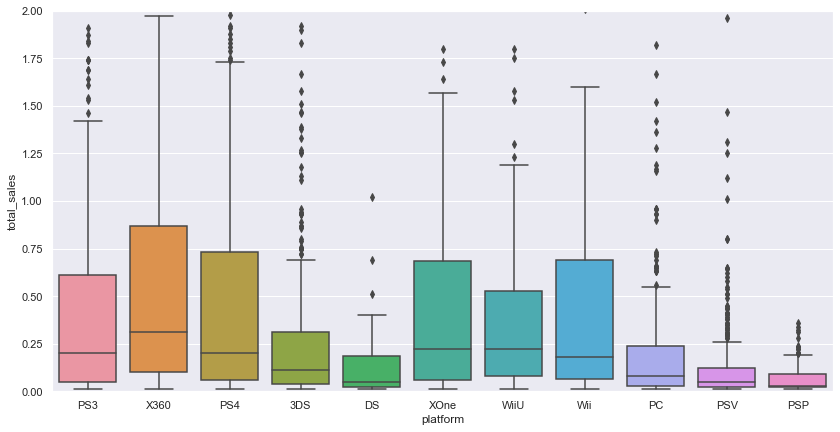

In [28]:
# check the mean sales in terms of platform
# biuld the boxplot
plt.figure(figsize=(14,7))
a = sns.boxplot(x='platform', y='total_sales', data=data_filtered)
a.set(ylim=(0, 2));

##### Depending on the platform, the maximum sales of games range from about 0.2 to 2 mln dollars, i.e. about a ten-fold difference. As for the mean values, they range from about 0.03 to 0.32 mln dollars.

#### Look at how user and critics scores affect to sales within one popular platform (will use platform PS4 as the most ) <br> Build a scatter chart and calculate the correlation between reviews and sales. Formulate conclusions.

In [29]:
# select the rows for PS4 platform
data_ps4 = data_filtered.loc[data_filtered['platform'] == 'PS4']

# calculate the correlation coefficient
print('correlation coefficient between total_sales and critic_score:', data_ps4['total_sales'].corr(data_ps4['critic_score']))
print('correlation coefficient between total_sales and user|_score:', data_ps4['total_sales'].corr(data_ps4['user_score']))

correlation coefficient between total_sales and critic_score: 0.406567902061781
correlation coefficient between total_sales and user|_score: -0.027427851974847168


##### We can see there is a weak positive colleration between total_sales and critic_score and there is minor negative colleration between total_sales and user_score on the PS4 platform

In [30]:
# check the correlation coefficient for all selected for analisys platforms
print('correlation coefficient between total_sales and critic_score:', data_filtered['total_sales'].corr(data_filtered['critic_score']))
print('correlation coefficient between total_sales and user|_score:', data_filtered['total_sales'].corr(data_filtered['user_score']))

correlation coefficient between total_sales and critic_score: 0.30791700492024665
correlation coefficient between total_sales and user|_score: 0.005132834430652689


##### On complete data, the behavior of the correlation coefficient is similar

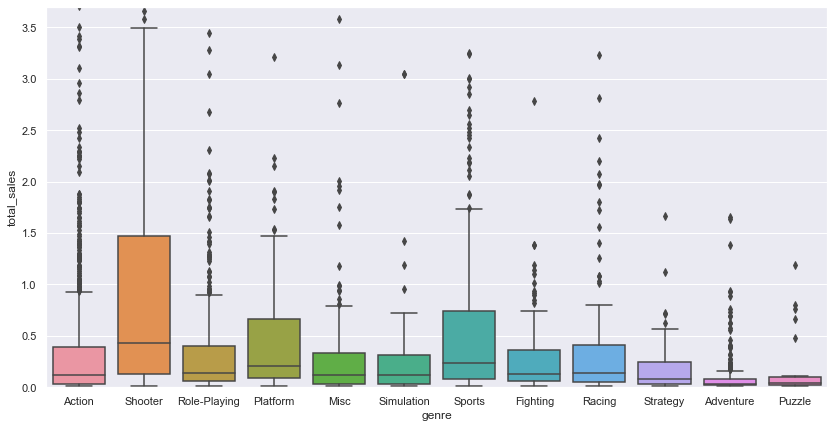

In [31]:
# look at the distribution of sales in term of genre 
plt.figure(figsize=(14,7))
a = sns.boxplot(x='genre', y='total_sales', data=data_filtered)
a.set(ylim=(0, 3.7));

##### We can highlight 3 liders of sales in term of genre: platform: Shooter, Sport and Platform <br>  The outsiders are Adventure and Puzzle

### Stage 4. Describe a user portrait for each region

##### Specify for the user of each region (NA - North America, EU - Europa, JP - Japan):
1. The Top-5 most popular platforms
2. The Top-5 most popular ganres
3. Does the ESRB rating affect sales in a particular region? 

In [32]:
#create the pivot_table to analyse top 5 the most popular platform
data_pivot_platform = data_filtered.pivot_table(index = 'platform', 
                                                values = ('na_sales','eu_sales','jp_sales','total_sales'), 
                                                aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).head()
data_pivot_platform

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,141.09,15.96,108.74,314.14
PS3,106.86,35.29,103.38,288.79
X360,74.52,1.57,140.05,236.54
3DS,42.85,87.84,56.15,195.80
XOne,51.59,0.34,93.12,159.32


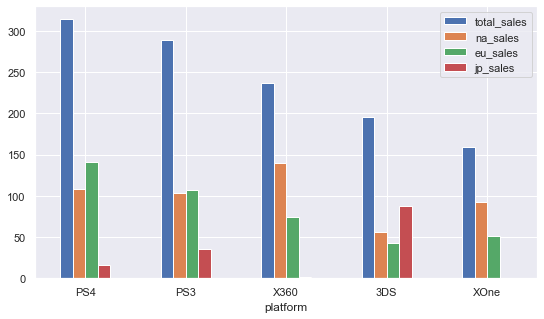

In [33]:
# create a bar blot to look at dispersion of sales in terms of platform
ax = data_pivot_platform.plot(y=['total_sales','na_sales','eu_sales','jp_sales'], 
                            kind="bar", rot = 0,figsize=(9,5) );

##### Top 5 Most Popular Selling Platforms: <br>1.PS4 <br>2.PS3 <br>3.X360 <br>4.3DS <br>5.XOne <br> However, the distribution of popularity among leaders is not the same. <br> For example, on the PS4 platform, Europe is a clear leader, and takes a little less than 50% of all sales of this platform. <br> While the X360 platform is the leader in sales in North America, game sales account for 60% of all sales on this platform. <br> In Japan, the most popular platform is 3DS, accounting for 45% of game sales on this platform. Also, an interesting fact is that in Japan there are practically no sales on X360 and XOne platforms. <br> The PS3 platform has the same sales in North America and Europe.

In [34]:
#create the pivot_table to analyse top 5 the most popular genres
data_pivot_genre = data_filtered.pivot_table(index = 'genre', 
                                                values = ('na_sales','eu_sales','jp_sales','total_sales'), 
                                                aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).head()
data_pivot_genre

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,159.78,52.80,178.08,441.87
Shooter,113.49,9.23,144.81,304.80
Role-Playing,48.58,65.54,64.11,193.09
Sports,69.09,8.03,81.53,181.09
Misc,26.32,12.86,38.19,85.04


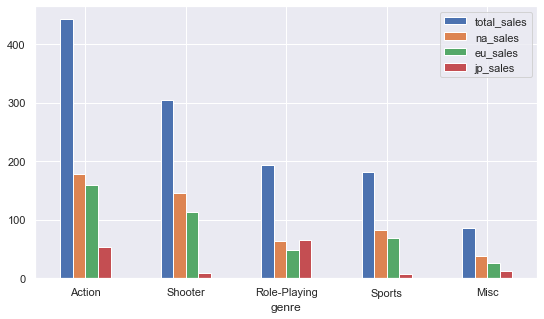

In [35]:
# create a bar plot to look at dispersion of sales in terms of genre
ax = data_pivot_genre.plot(y=['total_sales','na_sales','eu_sales','jp_sales'], 
                            kind="bar", rot = 0,figsize=(9,5) );

##### Top 5 most popular genres by sales: <br> 1.Action  <br>2.Shooter <br>3.Role-Playing <br>4.Sport<br>5.Misc <br>America and Europe and in total in two regions accounts for 76% of sales for this genre. <br> In Japan, on the contrary, these genres are not so popular, and Role-Playing is leading there. Shooter and Sport genres are not popular in Japan.

In [36]:
# Check the dependence of sales on the rating ESRB in the specific region
data_pivot_rating = data_filtered.pivot_table(index = 'rating', 
                                                values = ('na_sales','eu_sales','jp_sales','total_sales'), 
                                                aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).head()
data_pivot_rating

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,194.21,21.20,231.63,510.46
E,113.05,28.33,114.49,287.33
T,53.01,26.09,66.31,163.39
E10+,55.56,8.19,75.96,155.98


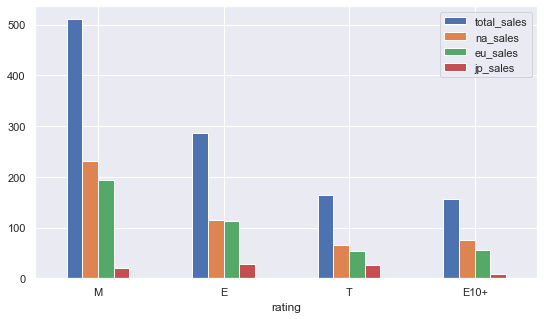

In [37]:
# create a bar blot to look at dispersion of sales in terms of genre
ax = data_pivot_rating.plot(y=['total_sales','na_sales','eu_sales','jp_sales'], 
                            kind="bar", rot = 0,figsize=(9,5) );

##### Over the past 5 years, games have been released in 4 genres: <br> E ------ Everyone <br> T ------ Teen (13+) <br> M ---- - Mature (17+) <br> E10 + - Everyone 10+ <br> In general, games in different genres have the same tendency in sales. The most popular genre is M (17+), the least popular is E (10+), aimed at children from 10 years old. <br> The genres E (for all) and T (13+) are selling better in Japan than in other regions.

### Stage 5. Hypothesis tests 

##### Test two hypotheses:
1.  The mean user score for platform Xbox and PS are similar
2. The mean user score for rating Action and Sport are similar

In [38]:
# test hypothes: The mean user score for platform Xbox and PS are similar

alpha = 0.05 

data_filtered_xbox = data_filtered.loc[(data_filtered['platform'] == 'XOne') & (data_filtered['user_score'].isna() == False)]
data_filtered_ps = data_filtered.loc[(data_filtered['platform'] == 'PS4') & (data_filtered['user_score'].isna() == False)]
 
results = st.ttest_ind(
    data_filtered_xbox['user_score'], 
    data_filtered_ps['user_score'])

print('Xbox user_score mean:',data_filtered_xbox['user_score'].mean())
print('One user_score mean:',data_filtered_ps['user_score'].mean())
print('--------------------------')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("null hypothesis is rejected")
else:
    print("null hypothesis can't be rejected")

Xbox user_score mean: 6.524864864864863
One user_score mean: 6.737451737451736
--------------------------
p-value: 0.12272484820678031
null hypothesis can't be rejected


##### Conclusion: Mean user score for platform XOne and PS4 are similar. 

In [39]:
# test hypothes: The mean user score for rating Action and Sport are similar
alpha = 0.05 

data_filtered_action = data_filtered.loc[(data_filtered['genre'] == 'Action') & (data_filtered['user_score'].isna() == False)]
data_filtered_sports = data_filtered.loc[(data_filtered['genre'] == 'Sports') & (data_filtered['user_score'].isna() == False)]
 
results = st.ttest_ind(
    data_filtered_action['user_score'], 
    data_filtered_sports['user_score'])

results = st.ttest_ind(
    data_filtered_action['user_score'], 
    data_filtered_sports['user_score'])

print('Action user_score mean:',data_filtered_action['user_score'].mean())
print('Sports user_score mean:',data_filtered_sports['user_score'].mean())
print('--------------------------')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("null hypothesis is rejected")
else:
    print("null hypothesis can't be rejected")


Action user_score mean: 6.808990825688083
Sports user_score mean: 5.5055
--------------------------
p-value: 7.861631084349674e-24
null hypothesis is rejected


##### Conclusion: The user score for ganres Action and Sports are different.

### Overall conclusion 
#####  During planning an advertising campaign for 2017, it's recommend placing more emphasis on games that meet the following parameters.



1. For planning sales, you should take into account the data only for the last 5 years.<br>
2. Platform lifetime ranges from 7 to 11 years. The peak of popularity (maximum sales) falls on 4-6 years of the platform's life. <br> Based on this information, in 2017, the emphasis on the advertising campaign, first of all, should be done on the Play Station 4 platform (its popularity will last at least 2-3 years , however, sales are already declining). <br> On the second and third place, respectively, the platform Xbox 360 and XBox One. But, these platforms "end their era" and in 1-2 years, sales will come to naught (do not invest heavily in advertising). <br> Also, everything indicates that soon there will be new platforms for computer games, but in 2017, they will not have time to gain due popularity.
3. The main genres to focus on in 2017 are Action and Shooter. They are popular in all regions. Role playing hot should be emphasized in an advertising campaign for the Japanese region.
4. User reviews are not worth paying much attention to as they are not correlated with sales. Critical reviews may affect sales, but not significantly
5. As for the age limit, in 2017 the most popular will be games for teenagers (17+) and for the category "for all"